## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
### 1. 머신러닝 (50점)

In [190]:
import pandas as pd
import urllib.request
from urllib.parse import quote
from io import StringIO

url1 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv'
encoded_url1 = quote(url1, safe=':/')

response1 = urllib.request.urlopen(encoded_url1)
hotel = pd.read_csv(StringIO(response1.read().decode('utf-8')))
hotel

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


In [2]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

In [3]:
# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [4]:
# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

In [5]:
# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP\ADP_study


#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [7]:
# 분석 시작
import time

start_time = time.time()

In [191]:
hotel.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [192]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [193]:
round(hotel.describe(), 3)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.000,19995.000,20000.000,20000.000,19642.000,20000.000,20000.000,20000.000,20000.000,18937.000
mean,0.120,85.978,0.893,2.380,0.038,0.033,0.169,0.269,1.984,101.410
std,0.325,96.427,0.952,1.777,0.192,0.456,1.502,0.688,15.927,49.245
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-6.380
25%,0.000,11.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,68.800
50%,0.000,51.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,94.500
75%,0.000,132.000,2.000,3.000,0.000,0.000,0.000,0.000,0.000,126.000
max,1.000,629.000,13.000,30.000,1.000,26.000,66.000,17.000,379.000,451.500


In [194]:
# y의 분포 알아보기
hotel['is_canceled'].value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

In [195]:
cat_col = [col for col in hotel.select_dtypes(include = 'object').columns]
cat_col.append('is_canceled')
cat_col.append('is_repeated_guest')

print(cat_col)

['deposit_type', 'is_canceled', 'is_repeated_guest']


In [196]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(hotel['deposit_type'])
hotel['deposit_type'] = le.transform(hotel['deposit_type'])

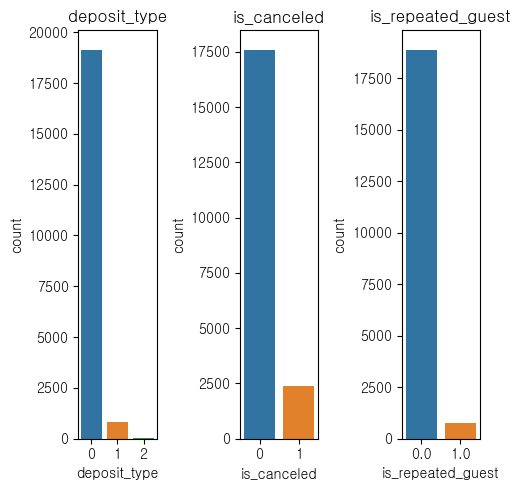

In [197]:
fig = plt.figure(figsize = (5, 5))

for i, col in enumerate(cat_col) :
    plt.subplot(1, 3, i + 1)
    sns.countplot(x = col, data = hotel)
    plt.title(col)
    
plt.tight_layout()

In [198]:
for col in cat_col : 
    print(col)
    display(hotel[col].value_counts())

deposit_type


0    19138
1      834
2       28
Name: deposit_type, dtype: int64

is_canceled


0    17600
1     2400
Name: is_canceled, dtype: int64

is_repeated_guest


0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64

In [199]:
num_col = list(set(hotel.columns) - set(cat_col))
len(num_col)

8

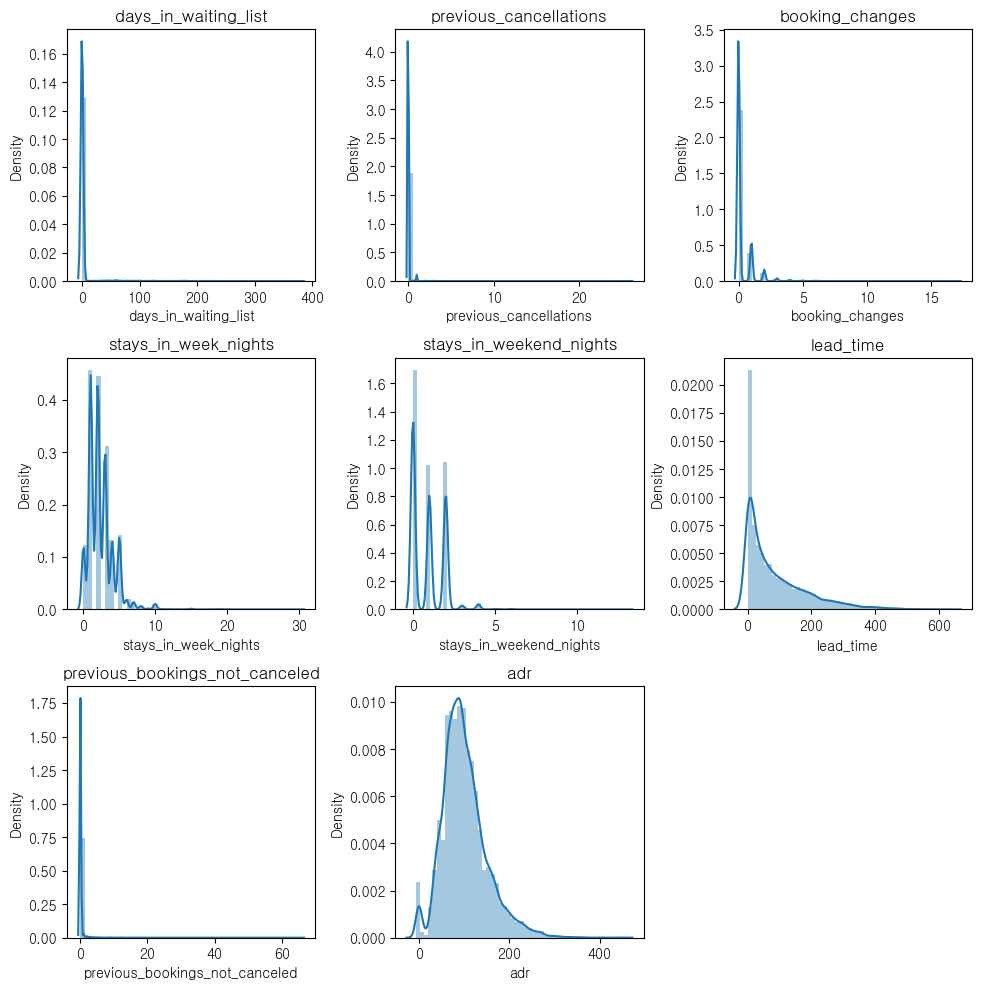

In [200]:
fig = plt.figure(figsize = (10, 10))

for i, col in enumerate(num_col) :
    plt.subplot(3, 3, i + 1)
    sns.distplot(hotel[col])
    plt.title(col)
    
plt.tight_layout()

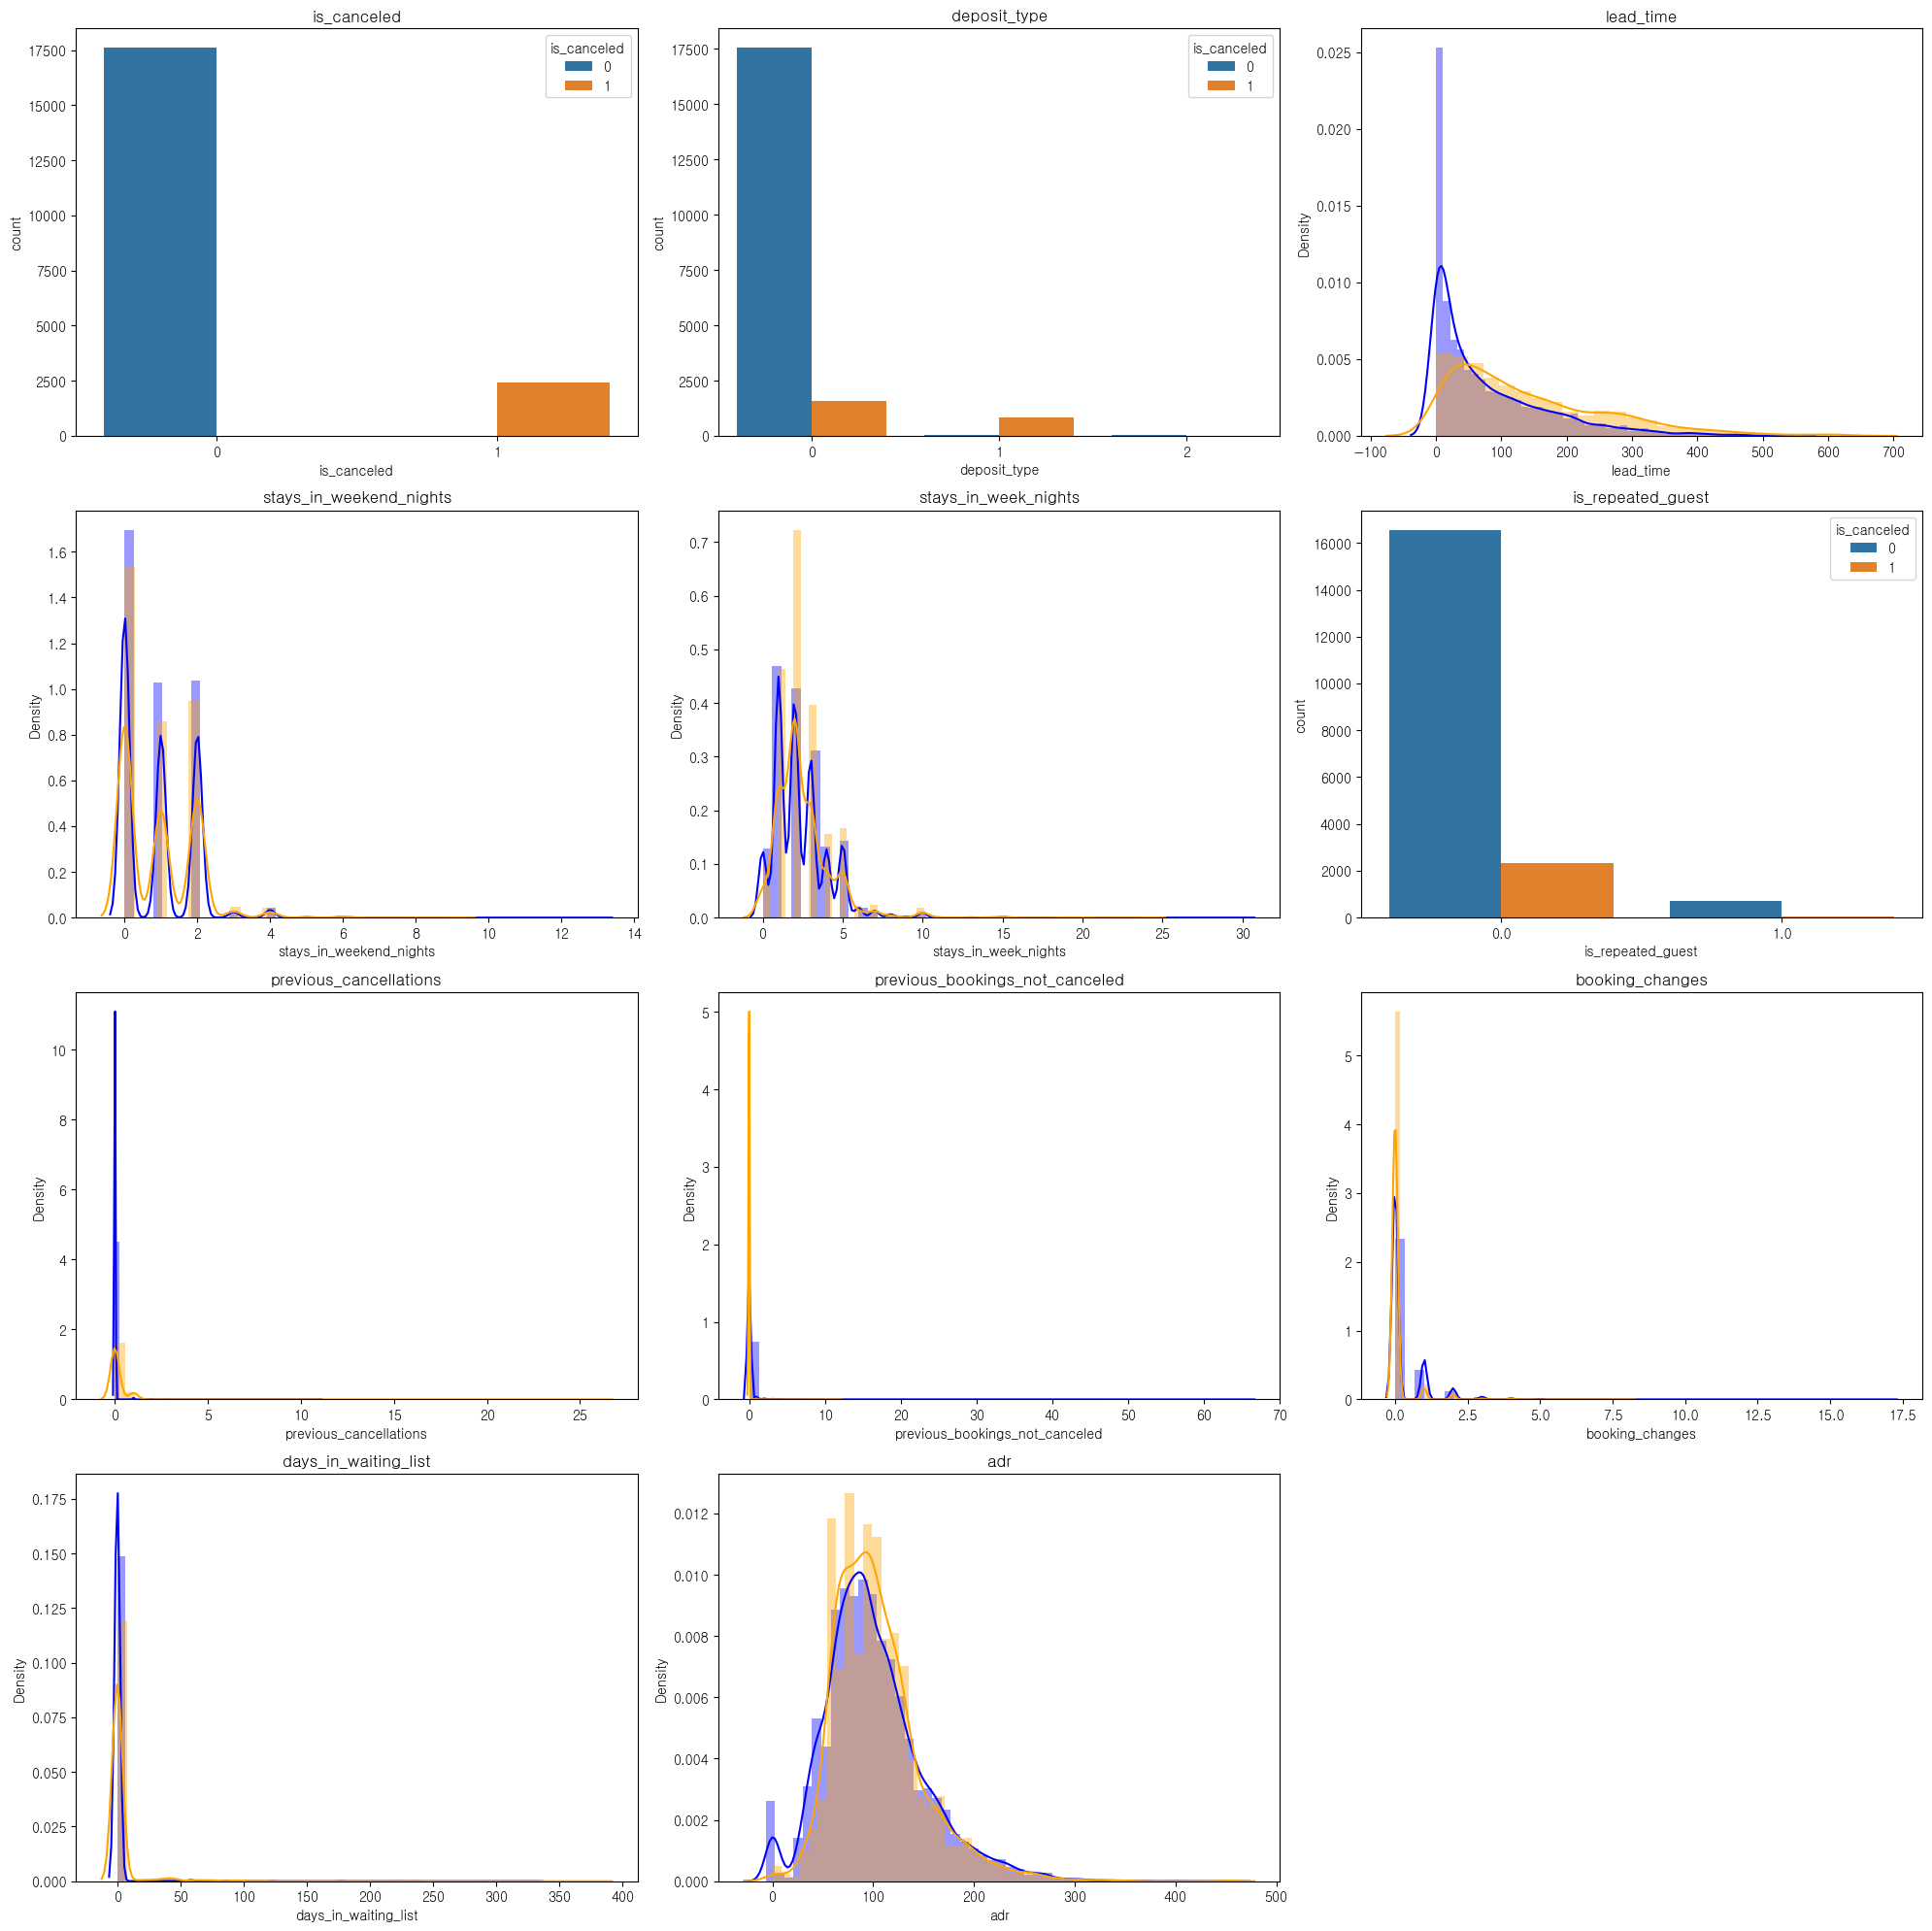

In [201]:
fig = plt.figure(figsize = (20, 20))

for i, col in enumerate(hotel.columns) : 
    plt.subplot(4, 3, i + 1)
    
    if col in cat_col : 
        sns.countplot(x = col, hue = 'is_canceled', data = hotel)
        plt.title(col)
    else : 
        sns.distplot(hotel[hotel['is_canceled'] == 0][col], color = 'blue')
        sns.distplot(hotel[hotel['is_canceled'] == 1][col], color = 'orange')
        plt.title(col)
    
plt.tight_layout()

<Axes: >

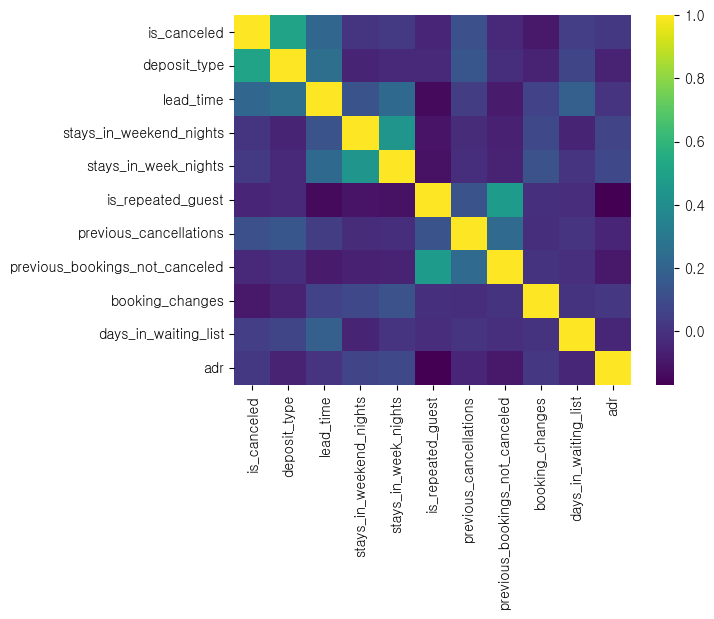

In [202]:
sns.heatmap(hotel.corr(), cmap = 'viridis')

#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [203]:
hotel.isnull().sum()[hotel.isnull().sum() > 0]

lead_time               5
is_repeated_guest     358
adr                  1063
dtype: int64

In [204]:
hotel_grouped_mean = hotel.groupby('is_canceled').agg('mean')
hotel_grouped_mode = hotel.groupby('is_canceled').agg(pd.Series.mode)

display(hotel_grouped_mean)
display(hotel_grouped_mode)

,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
is_canceled,,,,,,,,,,
0,0.004318,78.420290,0.888750,2.361080,0.041481,0.013068,0.189886,0.293409,1.737443,101.034845
1,0.339167,141.388333,0.920417,2.522083,0.013577,0.178333,0.016250,0.093333,3.791667,104.162354


,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
is_canceled,,,,,,,,,,
0,0,0.0,0,1,0.0,0,0,0,0,0.0
1,0,38.0,0,2,0.0,0,0,0,0,62.0


In [205]:
hotel['is_repeated_guest'].fillna(0, inplace = True)
hotel = hotel.groupby('is_canceled').apply(lambda x : x.fillna(x.mean()))

hotel.isnull().sum().sum() == 0

True

for col in hotel.isnull().sum()[hotel.isnull().sum() > 0].index : 
    if col in cat_col : 
        hotel[hotel['is_canceled'] == 0][col].fillna(hotel_grouped_mode.iloc[0][col], inplace = True)
        hotel[hotel['is_canceled'] == 1][col].fillna(hotel_grouped_mode.iloc[1][col], inplace = True)
    else : 
        hotel[hotel['is_canceled'] == 0][col].fillna(hotel_grouped_mean.iloc[0][col], inplace = True)
        hotel[hotel['is_canceled'] == 1][col].fillna(hotel_grouped_mean.iloc[1][col], inplace = True)


#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오

(1) 이상치를 처리한다.   
(2) 독립변수 간의 상관관계를 분석하여 차원축소 가능 여부를 확인한다.  
(3) Oversampling 혹은 Undersampling으로 데이터 불균형을 해소한다. 
(4) 데이터 스케일링을 진행하여 각 Feature들의 단위를 정리해준다.

In [206]:
for col in num_col : 
    q1, q3 = hotel[col].quantile(0.25), hotel[col].quantile(0.75)
    iqr = q3 - q1
    cutoff = 1.5 * iqr
    
    hotel[hotel[col] > q3 + cutoff][col] = q3
    hotel[hotel[col] > q1 - cutoff][col] = q1

#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

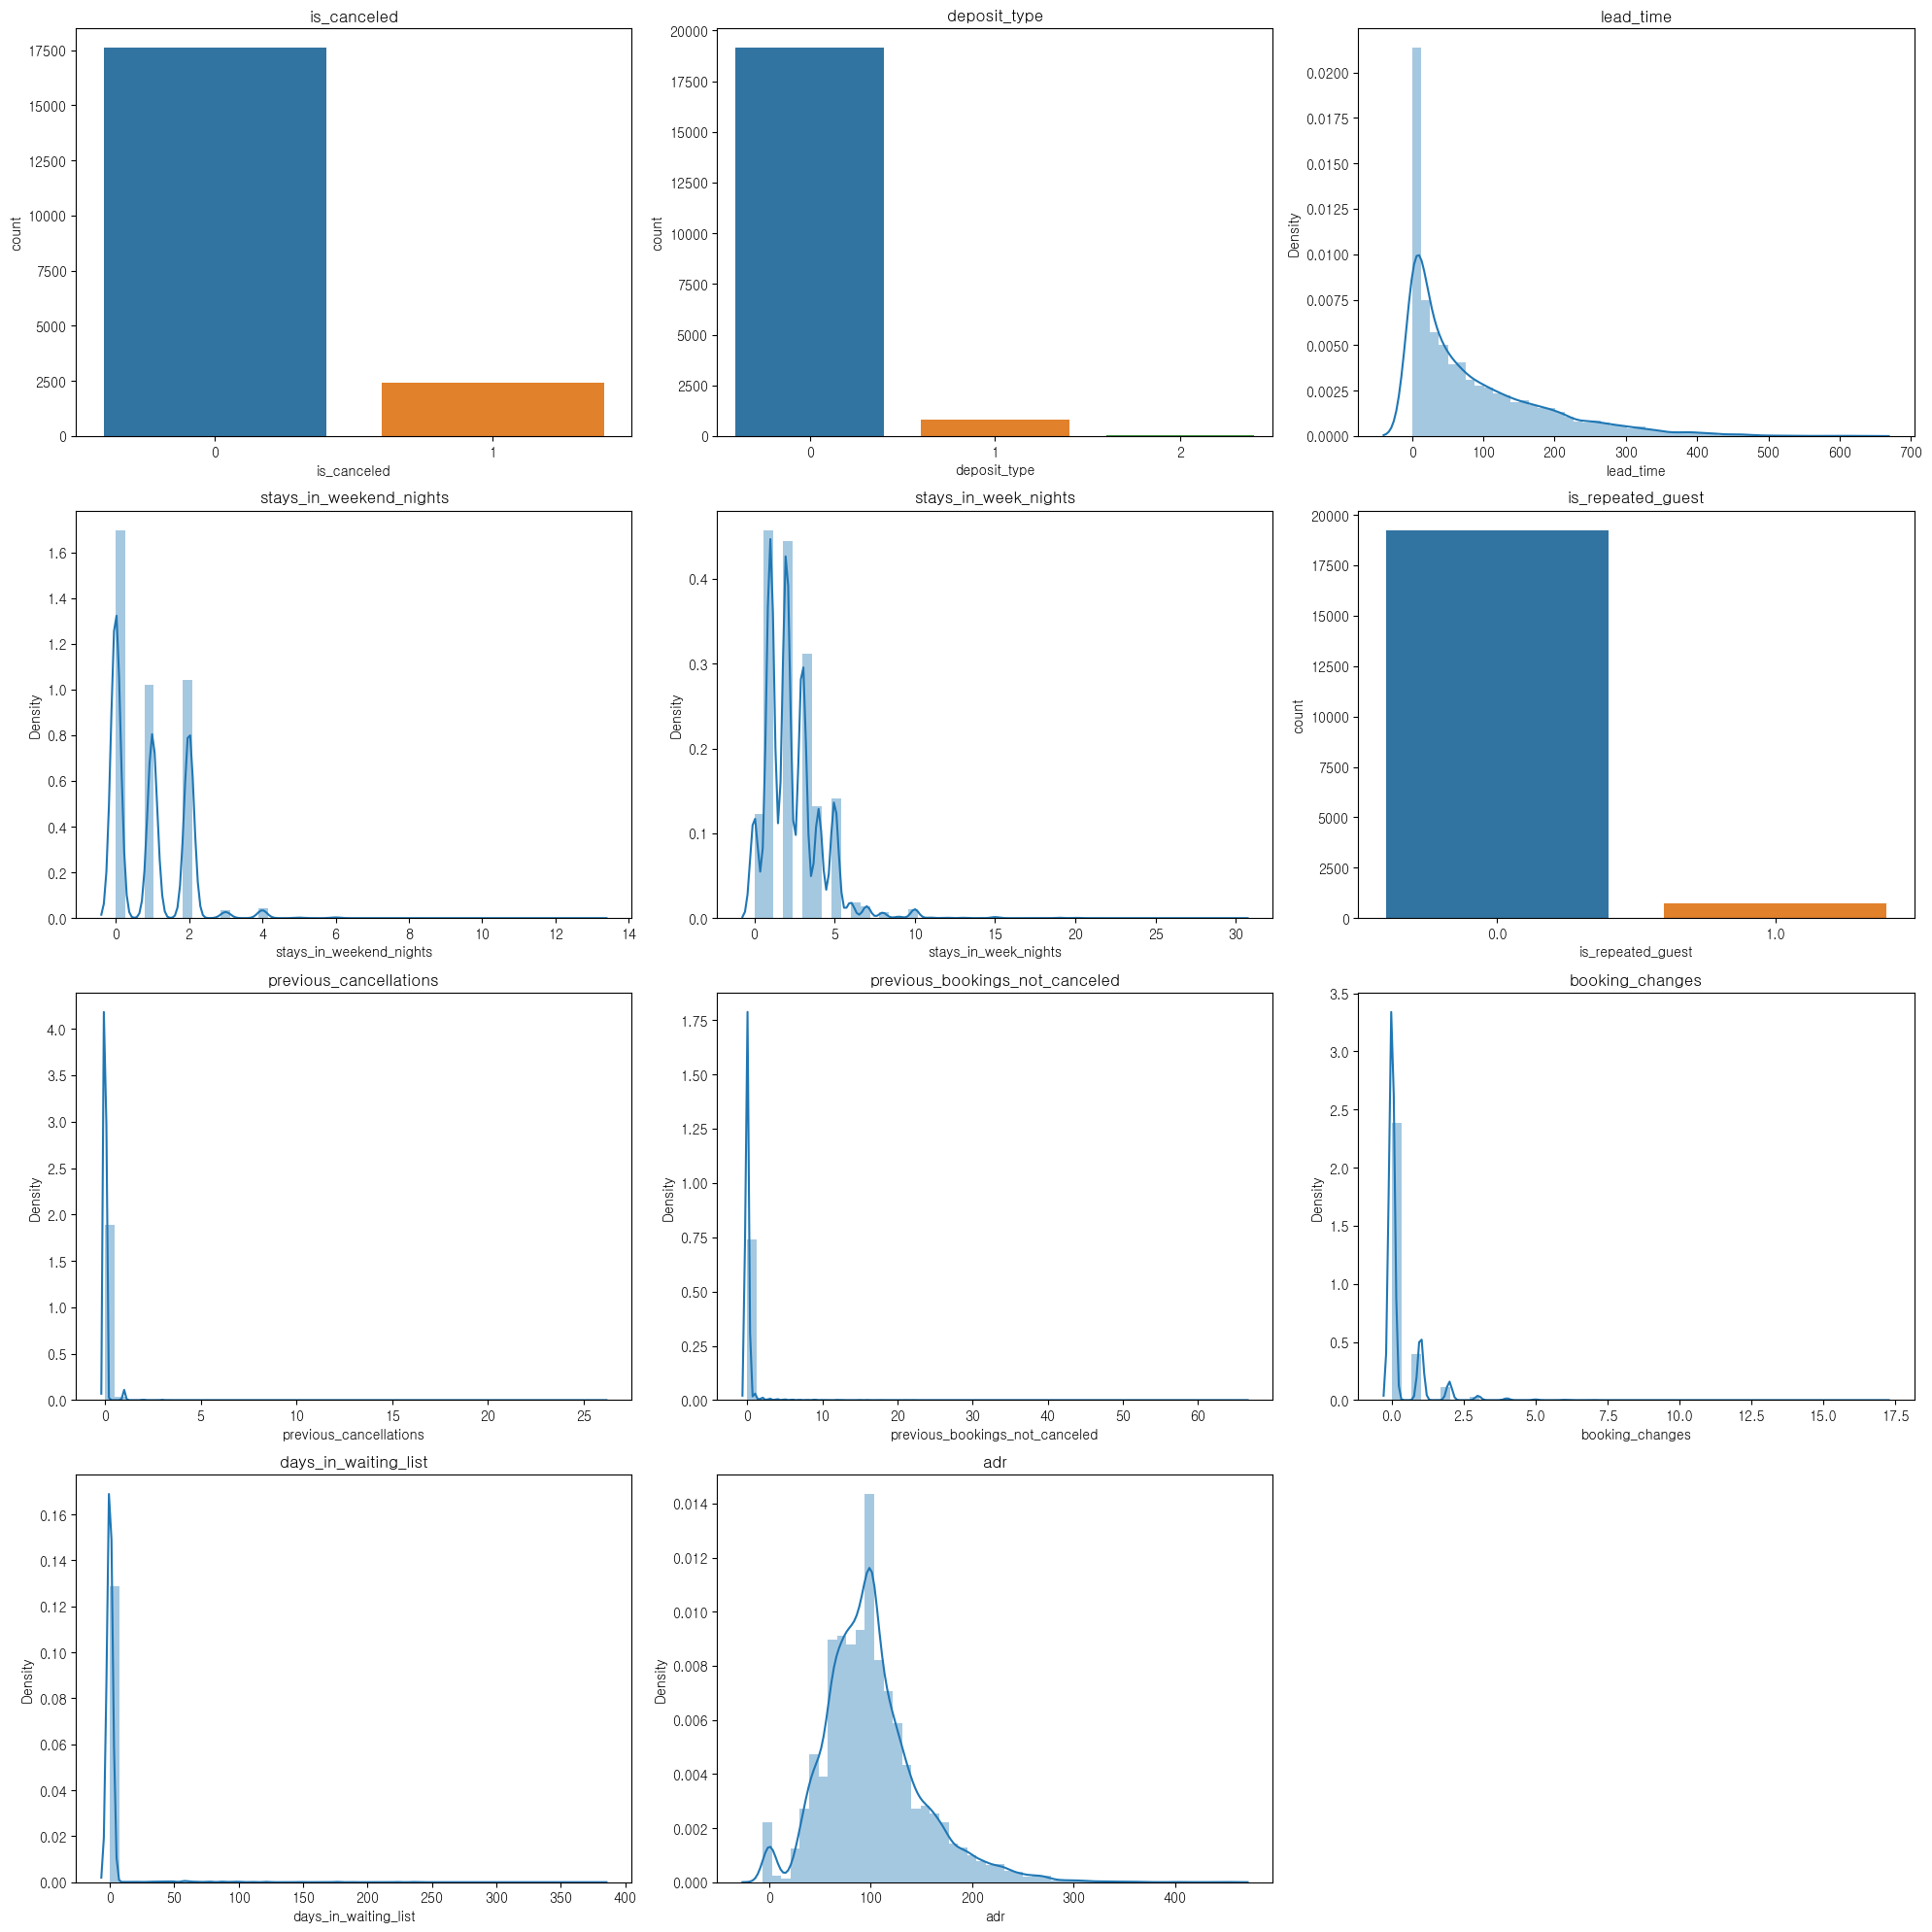

In [207]:
fig = plt.figure(figsize = (20, 20))

for i, col in enumerate(hotel.columns) : 
    plt.subplot(4, 3, i + 1)
    
    if col in cat_col : 
        sns.countplot(x = col, data = hotel)
        plt.title(col)
    else : 
        sns.distplot(hotel[col])
        plt.title(col)
    
plt.tight_layout()

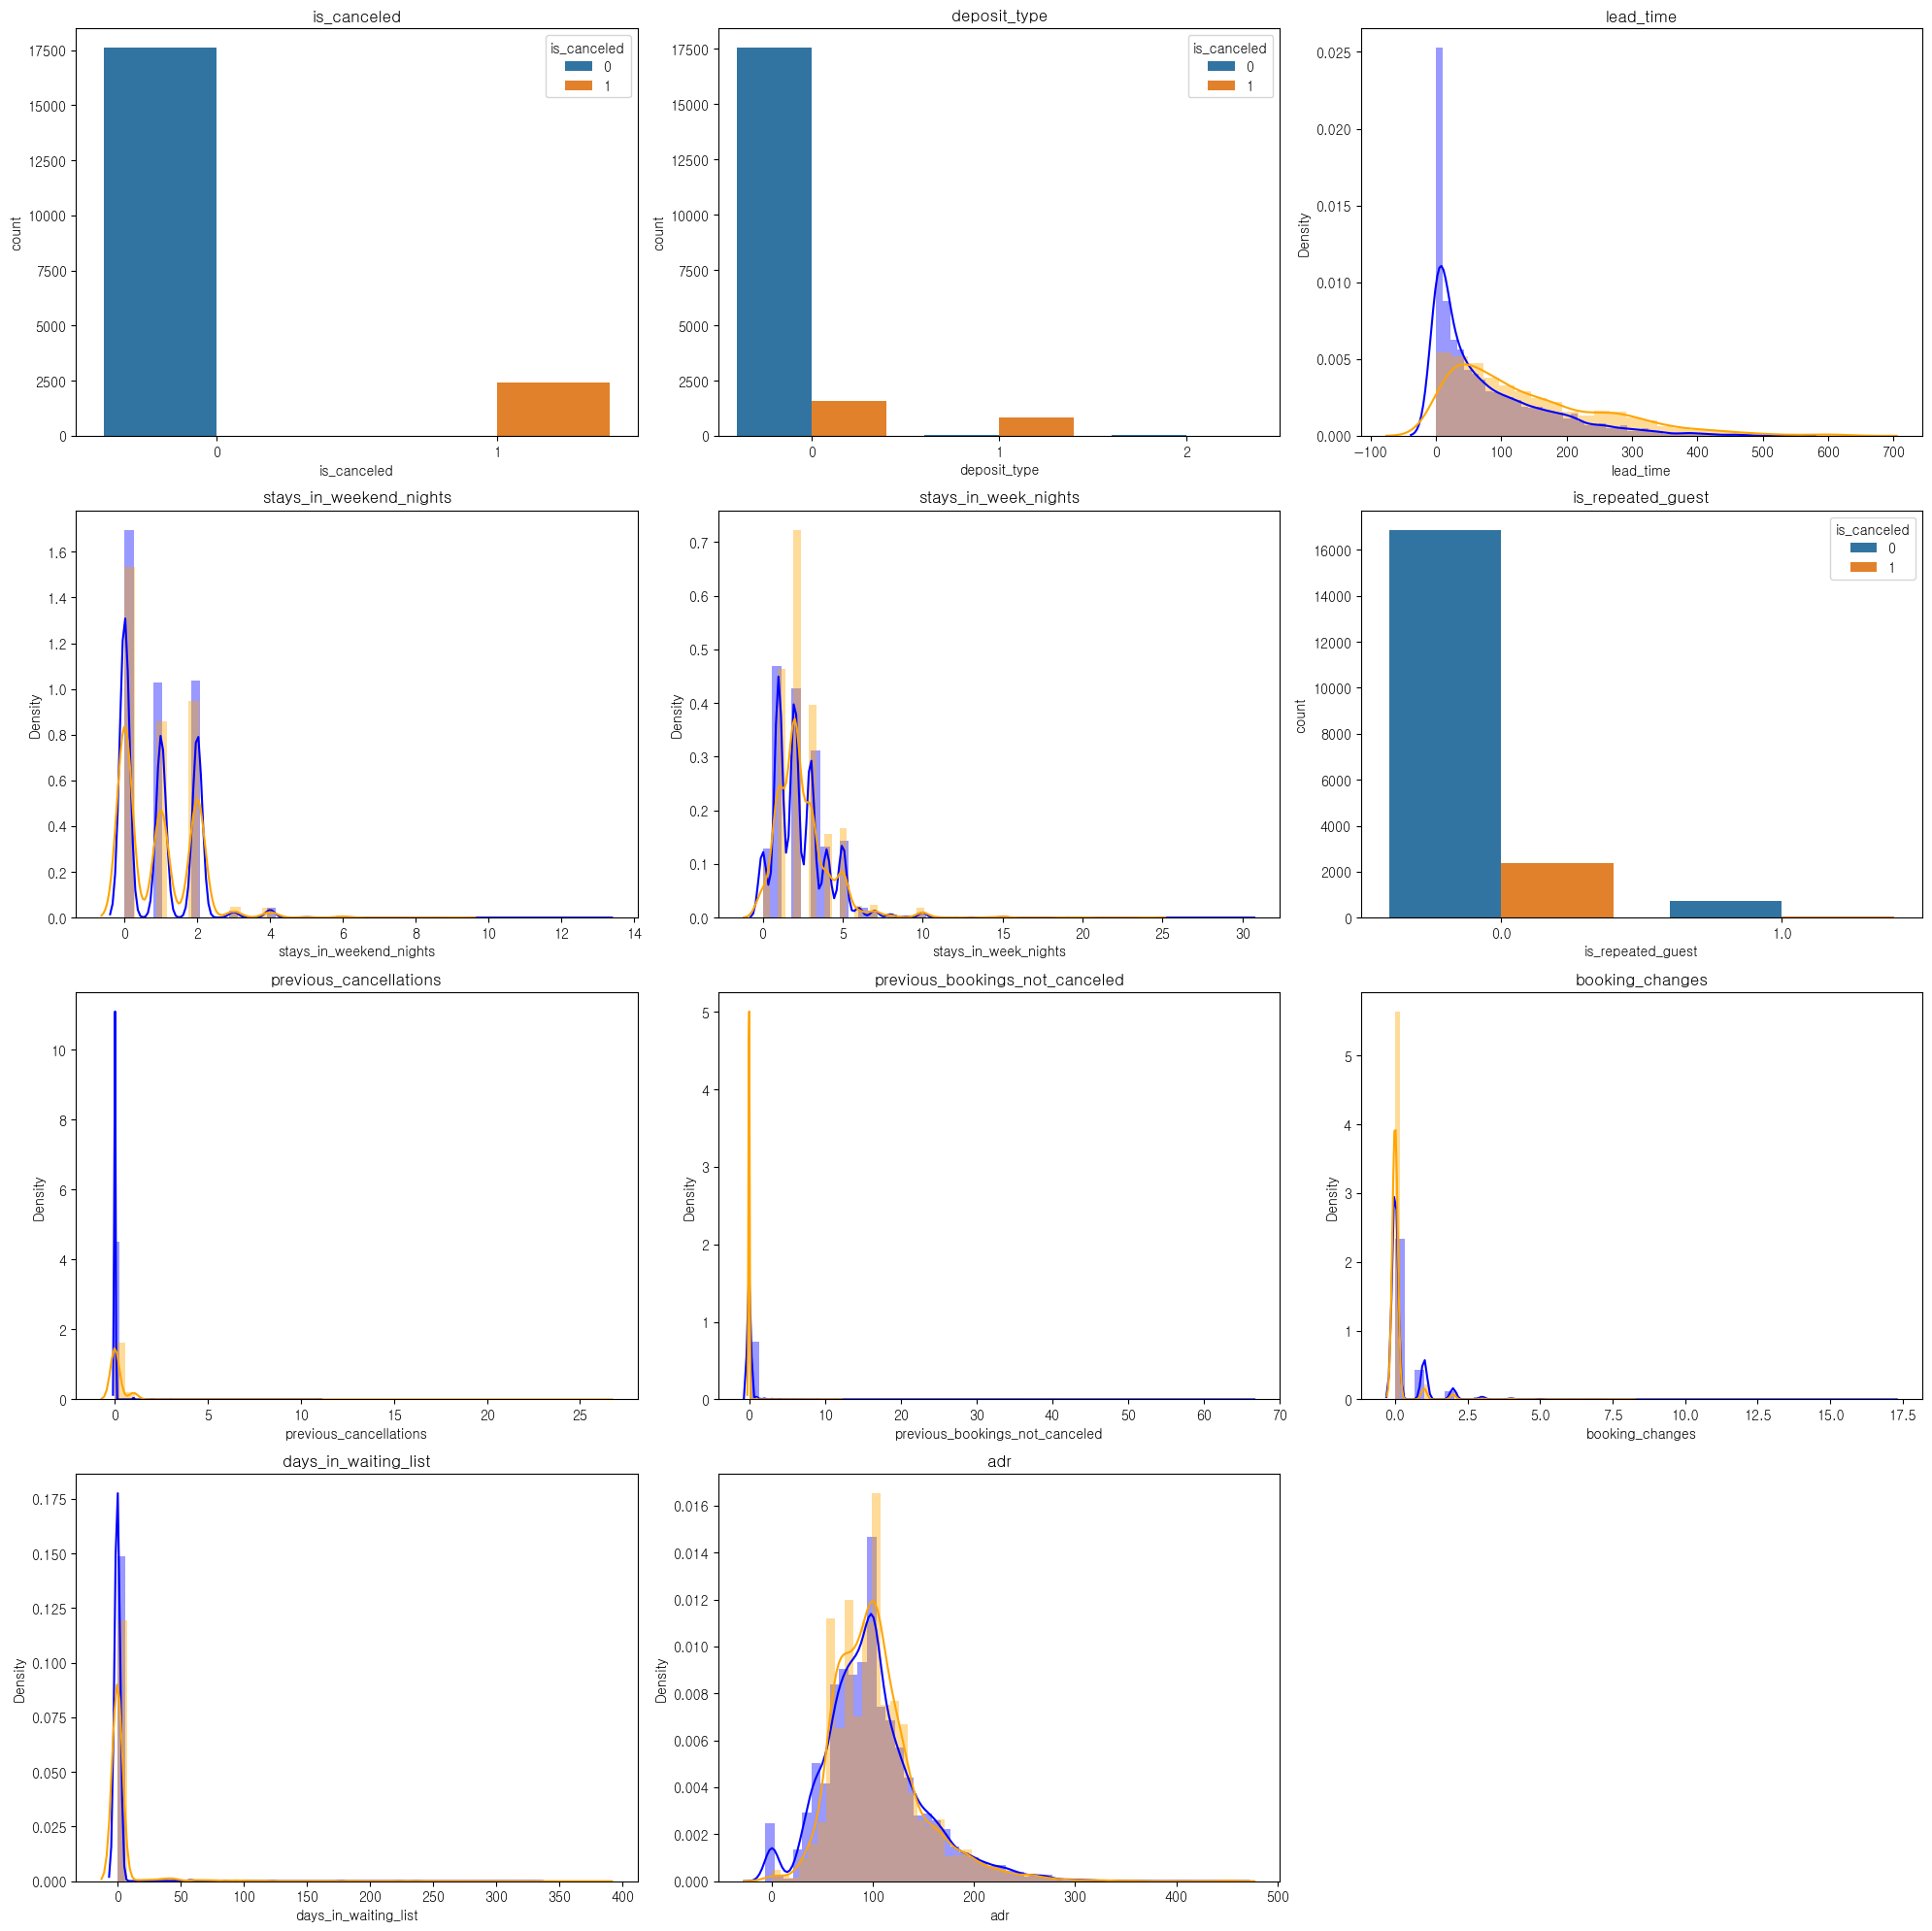

In [208]:
fig = plt.figure(figsize = (20, 20))

for i, col in enumerate(hotel.columns) : 
    plt.subplot(4, 3, i + 1)
    
    if col in cat_col : 
        sns.countplot(x = col, hue = 'is_canceled', data = hotel)
        plt.title(col)
    else : 
        sns.distplot(hotel[hotel['is_canceled'] == 0][col], color = 'blue')
        sns.distplot(hotel[hotel['is_canceled'] == 1][col], color = 'orange')
        plt.title(col)
    
plt.tight_layout()

In [209]:
for col in cat_col : 
    print(col)
    display(hotel[col].value_counts())

deposit_type


0    19138
1      834
2       28
Name: deposit_type, dtype: int64

is_canceled


0    17600
1     2400
Name: is_canceled, dtype: int64

is_repeated_guest


0.0    19251
1.0      749
Name: is_repeated_guest, dtype: int64

#### (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

Oversampling은 불균형 데이터에서 상대적으로 수가 적은 Minority Class를 Majority Class의 수에 맞게 데이터를 추가적으로 생성하는 방식을 통해 과적합을 방지하는 기법이다.

Oversampling에는 다음과 같은 방법들이 있다.

1) Random Sampling : Minority Class의 데이터 중 무작위로 선택하여 복사하는 방식으로 데이터를 추가 생성한다.  
2) SMOTE : KNN을 활용한 방법으로, 가까운 K개의 데이터 중 하나를 랜덤으로 선택하여 추가 데이터화한다. Minority Class에 속한 모든 데이터들에 대해서 실시한다.  
3) Borderline SMOTE : Minority Class의 데이터의 K개 근접 데이터 중 Majority Class의 데이터의 수를 확인한다. 근접한 Majority Class 데이터의 수가 많은 데이터에 대해서만 SMOTE를 적용한다.  
4) ADASYN : Borderline SMOTE와 유사하나, Scaling 과정을 추가하였다.
5) GAN : 생성자가 가짜 데이터를 생성하고 구분자가 이를 구별하여 피드백을 주는 방식으로 모델을 성장시켜간다.  

이 중 가장 간단하여 연산 시간이 빠른 Random Sampling, 그리고 범용성 있는 SMOTE를 사용하도록 한다. SMOTE는 데이터 선택 과정이 Random Sampling처럼 완전 무작위가 아니기 때문에, 상대적으로 Overfitting 가능성이 낮다.

#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [211]:
from sklearn.preprocessing import RobustScaler

In [212]:
# 1. Random Sampling : 가장 간단하여 연산이 빠름
diff = hotel['is_canceled'].value_counts()[0] - hotel['is_canceled'].value_counts()[1]

hotel_minor_add = hotel[hotel['is_canceled'] == 1].sample(diff, random_state = 1234, replace = True)
hotel_rs = pd.concat([hotel, hotel_minor_add], axis = 0)
hotel_rs.reset_index(drop = True, inplace = True)

hotel_y_rs = hotel_rs['is_canceled']
hotel_x_rs = hotel_rs.drop('is_canceled', axis = 1)

from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
hotel_x_rs = robust.fit_transform(hotel_x_rs)

In [213]:
# 2. SMOTE : Random Sampling보다 연산은 복잡하나, Overfitting 가능성이 낮다.
hotel_y = hotel['is_canceled']
hotel_x = hotel.drop('is_canceled', axis = 1)

from imblearn.over_sampling import SMOTE

smote = SMOTE()

hotel_x_sm, hotel_y_sm = smote.fit_resample(hotel_x, hotel_y)

robust2 = RobustScaler()
hotel_x_sm = robust2.fit_transform(hotel_x_sm)

In [214]:
# 3. 원데이터셋
display(hotel_x.head())
display(hotel_y.head())

robust3 = RobustScaler()
hotel_x = robust3.fit_transform(hotel_x)

,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,105.0,2,5,0.0,0,0,1,0,131.500000
1,0,303.0,2,2,0.0,0,0,0,0,73.950000
2,0,33.0,2,3,0.0,0,0,0,0,101.034845
3,0,48.0,0,1,0.0,0,0,1,0,80.300000
4,0,216.0,4,7,0.0,0,0,2,0,60.900000


0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [215]:
from sklearn.model_selection import train_test_split

hotel_x_train_rs, hotel_x_test_rs, hotel_y_train_rs, hotel_y_test_rs = train_test_split(
hotel_x_rs, hotel_y_rs, test_size = 0.3, stratify = hotel_y_rs, random_state = 1234)

hotel_x_train_sm, hotel_x_test_sm, hotel_y_train_sm, hotel_y_test_sm = train_test_split(
hotel_x_sm, hotel_y_sm, test_size = 0.3, stratify = hotel_y_sm, random_state = 1234)

hotel_x_train, hotel_x_test, hotel_y_train, hotel_y_test = train_test_split(
hotel_x, hotel_y, test_size = 0.3, stratify = hotel_y, random_state = 1234)

In [307]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [315]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

param_grid = {'n_estimators' : [100, 200, 500]
             , 'max_depth' : [None, 5, 8]
             , 'min_samples_leaf' : [1, 2, 4]}

param1 = 200
param2 = None
param3 = 2

rf1 = RandomForestClassifier(n_estimators = param1, max_depth = param2, min_samples_leaf = param3)
rf2 = RandomForestClassifier(n_estimators = param1, max_depth = param2, min_samples_leaf = param3)
rf3 = RandomForestClassifier(n_estimators = param1, max_depth = param2, min_samples_leaf = param3)

# 1. Random Sampling 데이터
start = time.time()

rf1.fit(hotel_x_train_rs, hotel_y_train_rs)
x_pred1 = rf1.predict(hotel_x_test_rs)
x_pred_prob1 = rf1.predict_proba(hotel_x_test_rs)[:, 1]

print(f'RS 데이터 연산 시간 : {time.time() - start}')
print(f'Accuracy : {accuracy_score(hotel_y_test_rs, x_pred1)}')
print(f'Precision : {precision_score(hotel_y_test_rs, x_pred1)}')
print(f'Recall : {recall_score(hotel_y_test_rs, x_pred1)}')
print(f'F1 : {f1_score(hotel_y_test_rs, x_pred1)}')
print(f'AUC : {roc_auc_score(hotel_y_test_rs, x_pred_prob1)}')

# 2. SMOTE 데이터
start = time.time()

rf2.fit(hotel_x_train_sm, hotel_y_train_sm)
x_pred2 = rf2.predict(hotel_x_test_sm)
x_pred_prob2 = rf2.predict_proba(hotel_x_test_sm)[:, 1]

print()
print(f'SMOTE 데이터 연산 시간 : {time.time() - start}')
print(f'Accuracy : {accuracy_score(hotel_y_test_sm, x_pred2)}')
print(f'Precision : {precision_score(hotel_y_test_sm, x_pred2)}')
print(f'Recall : {recall_score(hotel_y_test_sm, x_pred2)}')
print(f'F1 : {f1_score(hotel_y_test_sm, x_pred2)}')
print(f'AUC : {roc_auc_score(hotel_y_test_sm, x_pred_prob2)}')

# 3. 원데이터
start = time.time()

rf3.fit(hotel_x_train, hotel_y_train)
x_pred3 = rf3.predict(hotel_x_test)
x_pred_prob3 = rf3.predict_proba(hotel_x_test)[:, 1]

print()
print(f'원데이터 연산 시간 : {time.time() - start}')
print(f'Accuracy : {accuracy_score(hotel_y_test, x_pred3)}')
print(f'Precision : {precision_score(hotel_y_test, x_pred3)}')
print(f'Recall : {recall_score(hotel_y_test, x_pred3)}')
print(f'F1 : {f1_score(hotel_y_test, x_pred3)}')
print(f'AUC : {roc_auc_score(hotel_y_test, x_pred_prob3)}')

RS 데이터 연산 시간 : 4.8998122215271
Accuracy : 0.9542613636363636
Precision : 0.9294538943598926
Recall : 0.9831439393939394
F1 : 0.955545329038196
AUC : 0.991949394513315

SMOTE 데이터 연산 시간 : 4.822107791900635
Accuracy : 0.878125
Precision : 0.8807934388708755
Recall : 0.8746212121212121
F1 : 0.8776964743894327
AUC : 0.9504572177743343

원데이터 연산 시간 : 3.076847553253174
Accuracy : 0.9288333333333333
Precision : 0.9771986970684039
Recall : 0.4166666666666667
F1 : 0.5842259006815969
AUC : 0.8156563026094275


#### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

### 2. 통계분석 (50점)

#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

In [217]:
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]

#### (1) 연구가설, 귀무가설을 작성하시오.

H_0 : 시제품의 농도가 60이다.   
H_1 : 시제품의 농도는 60이 아니다.

#### (2) 유효한 샘플의 수를 계산하시오.

#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [251]:
# 표본 크기가 작으므로 비모수 검정
from scipy.stats import wilcoxon

result = wilcoxon(pd.Series(x) - 60)

print(f"검정통계량 : {result[0]}")

if result[1] >= 0.05 : 
    print('연구가설 채택 불가 (귀무가설 기각 불가)')
else : 
    print('연구가설 채택 (귀무가설 기각)')

검정통계량 : 9.5
연구가설 채택 불가 (귀무가설 기각 불가)


#### 2. 코로나 시계열 데이터로 다음을 수행하시오.

In [231]:
import pandas as pd
import urllib.request
from urllib.parse import quote
from io import StringIO

url2 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv'
encoded_url2 = quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2)
covid = pd.read_csv(StringIO(response2.read().decode('utf-8')))
covid

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


#### (1) ACF를 사용해서 distance를 계산하시오

In [241]:
covid['날짜'] = pd.to_datetime(covid['날짜'], format = '%Y-%m-%d')

covid['날짜'].max() - covid['날짜'].min()

Timedelta('784 days 00:00:00')

In [267]:
from statsmodels.tsa.stattools import acf

covid_acf = pd.DataFrame()

for col in covid.columns[1 : ] : 
    acf_result = acf(covid[col], nlags = len(covid))
    acf_result_df = pd.DataFrame({col : acf_result})
    
    covid_acf = pd.concat([covid_acf, acf_result_df], axis = 1)

#### (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

In [301]:
pd.DataFrame(linkage(covid_acf_t, method = 'complete')).iloc[:, 2].max() * 0.5

0.21303881598349

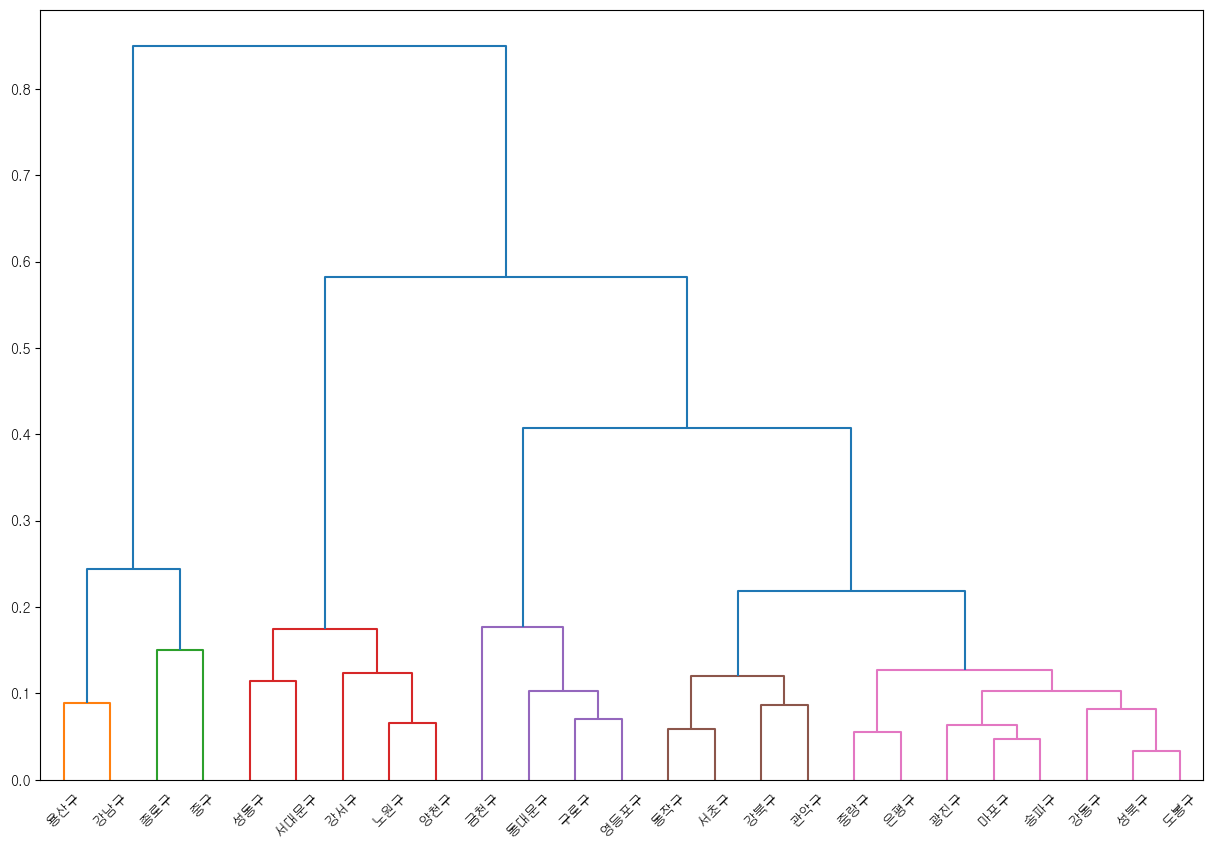

In [305]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

covid_acf_t = covid_acf.T

fig = plt.figure(figsize = (15, 10))

covid_dendrogram = dendrogram(linkage(covid_acf_t, method = 'complete'), color_threshold = 0.21303881598349
                             , labels = covid_acf_t.index)


#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [221]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
print (table)

         사회과학  자연과학  공학
3.5~4.5    16    12  18
2.5~3.5    30    20  13
1.5~2.5    12     3  14


#### (1) 연구가설, 귀무가설을 작성하시오.

H_0 (귀무가설) : 학과와 성적은 관계가 있다.  
H_1 (연구가설) : 학과와 성적은 관계가 없다.

#### (2) 학과와 성적이 독립일 때 기댓값을 구하시오.

In [229]:
from scipy.stats import chi2_contingency

result = chi2_contingency(table)

print(result[3])

[[19.33333333 11.66666667 15.        ]
 [26.47826087 15.97826087 20.54347826]
 [12.1884058   7.35507246  9.45652174]]


#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [225]:
from scipy.stats import chi2_contingency

result = chi2_contingency(table)

print(f"검정통계량 : {result[0]}")

if result[1] >= 0.05 : 
    print('연구가설 채택 불가 (귀무가설 기각 불가)')
else : 
    print('연구가설 채택 (귀무가설 기각)')

검정통계량 : 10.199441509990177
연구가설 채택 (귀무가설 기각)


In [226]:
# 중간점검(집가서 이어서 해야해!)
print((time.time() - start_time) / 60)

135.60250422557195
